# Assignment Final
* Team 6
* 24510099 Kim Dayeon
* 24510106 Park Jihyun
* 24510109 Lee Hanjong

# **1. Data Preprocessing**

In [ ]:
from posix import read
import os
import sklearn
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils.random import sample_without_replacement
origin = pd.read_csv('./okm_augumented_2021.csv')
origin.fillna(0, inplace=True)
origin.head()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
0,20210101,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5
1,20210101,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5
2,20210101,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5
3,20210101,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.0,1.5
4,20210101,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.0,1.5


In [ ]:
df_c = origin.copy()
df_c.fillna(0, inplace =True)
df_c.isnull().sum()

,0
날짜,0
시간,0
15분,0
30분,0
45분,0
60분,0
평균,0
생산량,0
기온,0
풍속,0


In [ ]:
# Change Column Name to English
df_c.rename(columns={
    '날짜': 'date',
    '시간': 'hour',
    '15분': 'min_15',
    '30분': 'min_30',
    '45분': 'min_45',
    '60분': 'min_60',
    '평균': 'average',
    '생산량': 'production',
    '기온': 'temperature',
    '풍속': 'wind_speed',
    '습도': 'humidity',
    '강수량': 'precipitation',
    '전기요금(계절)': 'electricity_cost',
    'day': 'day',
    'd': 'd',
    'm': 'm',
    '공장인원': 'factory_staff',
    '인건비': 'labor_cost'
}, inplace=True)

In [ ]:
df_c.describe()

,date,hour,min_15,min_30,min_45,min_60,average,production,temperature,wind_speed,humidity,precipitation,electricity_cost,day,d,m,factory_staff,labor_cost
count,6.168000e+03,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000
mean,2.021049e+07,12.428016,90.410182,92.695363,95.106355,95.037938,93.424125,467.344682,15.906064,2.062630,70.098735,2.243888,162.757198,4.003891,15.256809,4.770428,0.898851,1.313959
std,2.447756e+02,12.847309,55.349403,57.942122,59.285709,59.347554,57.355938,857.571815,9.160356,1.164724,22.996164,9.612754,30.820855,2.006957,8.799601,2.452431,1.983335,0.241700
min,2.021010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,8.000000,0.000000,109.800000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2.021031e+07,6.000000,23.000000,23.000000,23.000000,23.000000,23.000000,0.000000,9.600000,1.200000,53.000000,0.000000,167.200000,2.000000,8.000000,3.000000,0.000000,1.000000
50%,2.021051e+07,12.000000,101.000000,104.000000,105.000000,107.000000,104.000000,45.000000,17.400000,1.900000,74.000000,0.000000,167.200000,4.000000,15.000000,5.000000,0.111111,1.500000
75%,2.021071e+07,18.000000,133.000000,143.000000,149.000000,149.000000,144.000000,637.250000,23.300000,2.800000,91.000000,0.100000,191.600000,6.000000,23.000000,7.000000,1.160310,1.500000
max,2.021091e+07,188.000000,207.000000,222.000000,218.000000,214.000000,208.000000,9830.000000,33.400000,7.600000,98.000000,122.400000,191.600000,7.000000,31.000000,9.000000,48.386364,1.500000


# **2. EDA**

## Box Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

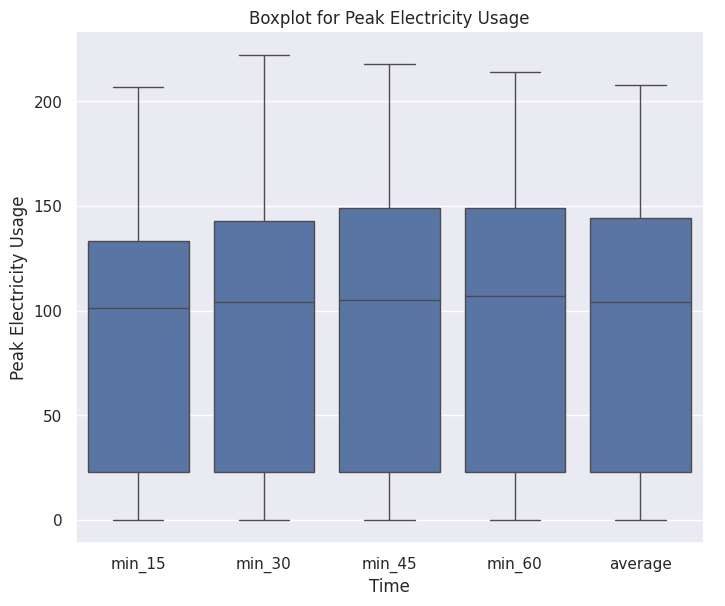

In [ ]:
# Reshape the Peak Electricity Usage columns
peak_usage_columns = ['min_15', 'min_30', 'min_45', 'min_60', 'average']
df_c_peaks_usage = df_c[peak_usage_columns].melt(var_name="Time", value_name="Peak Electricity Usage")

# Create boxplot
sns.catplot(data=df_c_peaks_usage, x="Time", y="Peak Electricity Usage", kind="box", height=6, aspect=1.2)
plt.title("Boxplot for Peak Electricity Usage")
plt.ylabel("Peak Electricity Usage")
plt.show()

## Heatmap

In [ ]:
df_c.corr()

,date,hour,min_15,min_30,min_45,min_60,average,production,temperature,wind_speed,humidity,precipitation,electricity_cost,day,d,m,factory_staff,labor_cost
date,1.000000,0.065435,0.035555,0.034746,0.037285,0.036244,0.036572,0.070719,0.863028,-0.268152,0.548722,0.160855,0.835836,-0.011838,-0.035210,0.999357,-0.002136,0.005469
hour,0.065435,1.000000,0.130084,0.124554,0.115947,0.097021,0.117865,0.031816,0.150262,0.009283,-0.030201,0.049157,0.067609,-0.036188,-0.010330,0.065681,0.012563,-0.034275
min_15,0.035555,0.130084,1.000000,0.980295,0.966859,0.950034,0.984688,0.520424,0.050760,0.115215,-0.085205,-0.008241,0.055881,-0.428312,0.052554,0.033601,0.295909,-0.202557
min_30,0.034746,0.124554,0.980295,1.000000,0.982443,0.959004,0.991255,0.515841,0.049524,0.114173,-0.084102,-0.010410,0.056203,-0.426674,0.055754,0.032679,0.288622,-0.195760
min_45,0.037285,0.115947,0.966859,0.982443,1.000000,0.984789,0.994774,0.513789,0.052818,0.115768,-0.082522,-0.013136,0.059044,-0.432957,0.056047,0.035203,0.286091,-0.211635
min_60,0.036244,0.097021,0.950034,0.959004,0.984789,1.000000,0.984828,0.499723,0.055651,0.128605,-0.090875,-0.014812,0.057878,-0.437576,0.056354,0.034153,0.276778,-0.243434
average,0.036572,0.117865,0.984688,0.991255,0.994774,0.984828,1.000000,0.517948,0.052996,0.119837,-0.086508,-0.011759,0.058096,-0.436280,0.055824,0.034499,0.289860,-0.215982
production,0.070719,0.031816,0.520424,0.515841,0.513789,0.499723,0.517948,1.000000,0.117780,0.115691,-0.109503,0.008171,0.068930,-0.259129,0.044836,0.068976,0.785115,-0.280625
temperature,0.863028,0.150262,0.050760,0.049524,0.052818,0.055651,0.052996,0.117780,1.000000,-0.192121,0.401553,0.118524,0.809825,0.010130,0.108487,0.857490,0.030540,-0.184611
wind_speed,-0.268152,0.009283,0.115215,0.114173,0.115768,0.128605,0.119837,0.115691,-0.192121,1.000000,-0.440112,0.048412,-0.254750,0.004037,-0.010588,-0.267261,0.088944,-0.350115


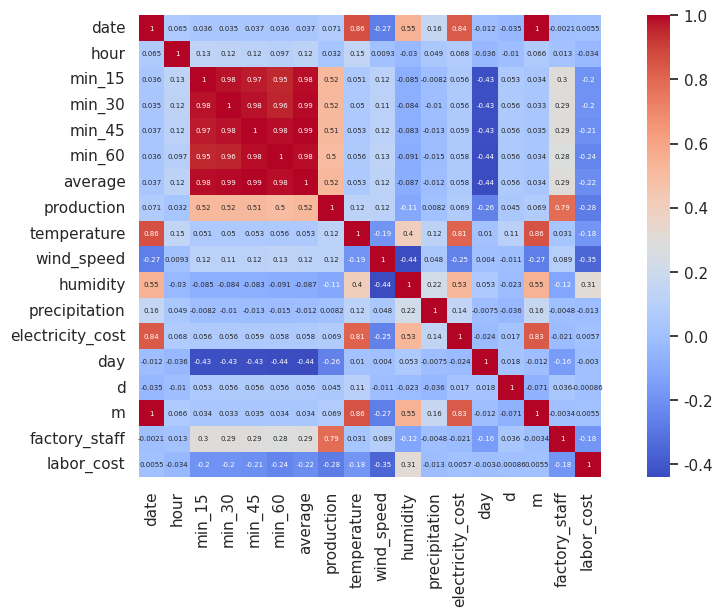

In [ ]:
sns.set(rc = {"axes.unicode_minus" : False}, style ="darkgrid")
plt.figure(figsize=(12, 6))
sns.heatmap(df_c.corr(), vmax=1, square=True, annot=True, annot_kws={'size': 5}, cmap='coolwarm')
plt.show()

## Line Chart

### Average of Peak Electricity Usage by Month

In [ ]:
# Monthly Peak Electricity Usage
monthly_peak_usage_pivot_table = df_c.pivot_table(
    index='m',
    values=peak_usage_columns,
    aggfunc='mean'
)

monthly_peak_usage_pivot_table

,average,min_15,min_30,min_45,min_60
m,,,,,
1,83.317204,80.872312,82.880376,84.668011,84.588710
2,91.638393,89.084821,90.845238,93.077381,93.046131
3,99.931452,96.779570,99.217742,101.732527,101.633065
4,94.712500,91.079167,93.970833,96.493056,96.800000
5,86.065860,83.064516,85.432796,87.581989,87.685484
6,102.973611,99.633333,102.229167,104.786111,104.787500
7,103.700269,100.233871,102.637097,106.127688,105.314516
8,81.224462,78.791667,80.603495,82.501344,82.477151
9,102.294643,99.119048,101.366071,104.059524,104.226190


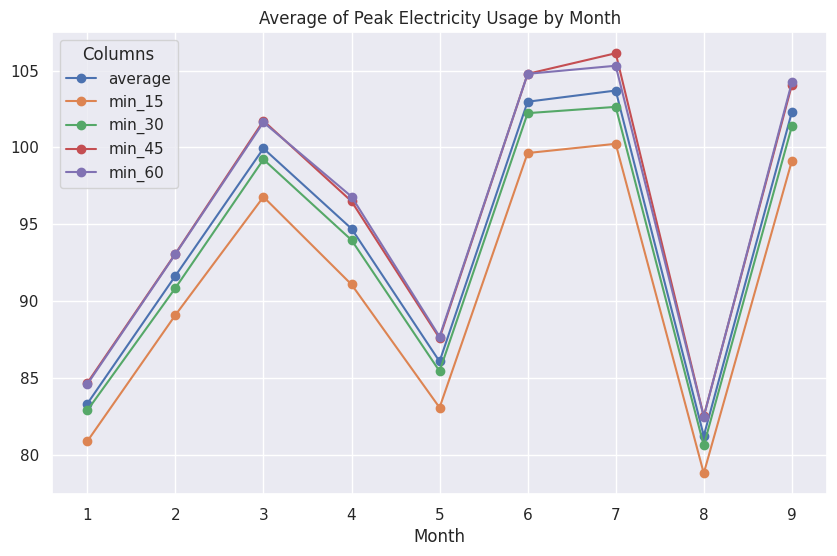

In [ ]:
# Create Line Chart
plt.figure(figsize=(10, 6))
for column in monthly_peak_usage_pivot_table.columns:
    plt.plot(monthly_peak_usage_pivot_table.index, monthly_peak_usage_pivot_table[column], marker='o', label=column)

plt.title("Average of Peak Electricity Usage by Month")
plt.xlabel("Month")
plt.legend(title="Columns")
plt.grid(True)
plt.show()

### Average of Peak Electricity Usage for Weekday and Weekend

In [ ]:
index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')
index_column

<ipython-input-44-c94b6be8eb7c>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')


DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-09-14 14:00:00', '2021-09-14 15:00:00',
               '2021-09-14 16:00:00', '2021-09-14 17:00:00',
               '2021-09-14 18:00:00', '2021-09-14 19:00:00',
               '2021-09-14 20:00:00', '2021-09-14 21:00:00',
               '2021-09-14 22:00:00', '2021-09-14 23:00:00'],
              dtype='datetime64[ns]', length=6168, freq='h')

In [ ]:
df_c_monthly_peaks_usage = df_c.drop(columns= ['date', 'hour', 'production', 'temperature', 'wind_speed', 'humidity', 'precipitation', 'electricity_cost', 'day', 'd', 'm', 'factory_staff', 'labor_cost'])
df_c_monthly_peaks_usage.index = index_column
df_c_monthly_peaks_usage.index.names = ['Date']
df_c_monthly_peaks_usage.head()

,min_15,min_30,min_45,min_60,average
Date,,,,,
2021-01-01 00:00:00,62,61,61,61,61
2021-01-01 01:00:00,96,93,116,113,105
2021-01-01 02:00:00,106,96,106,107,104
2021-01-01 03:00:00,92,110,110,109,105
2021-01-01 04:00:00,108,105,106,108,107


In [ ]:
# Weekend, Weekday
df_c_monthly_peaks_usage['Weekend'] = ((df_c_monthly_peaks_usage.index.dayofweek == 5) |
                                       (df_c_monthly_peaks_usage.index.dayofweek == 6)).astype(int)
df_c_monthly_average = df_c_monthly_peaks_usage.drop(columns= ['min_15', 'min_30', 'min_45', 'min_60'])
df_c_monthly_average

,average,Weekend
Date,,
2021-01-01 00:00:00,61,0
2021-01-01 01:00:00,105,0
2021-01-01 02:00:00,104,0
2021-01-01 03:00:00,105,0
2021-01-01 04:00:00,107,0
...,...,...
2021-09-14 19:00:00,153,0
2021-09-14 20:00:00,128,0
2021-09-14 21:00:00,128,0


In [ ]:
# pivot table
df_c_monthly_peaks_usage['Month'] = df_c_monthly_peaks_usage.index.month
df_c_monthly_average_pivot_table = df_c_monthly_peaks_usage.pivot_table(values='average', index='Month', columns='Weekend', aggfunc='mean')
df_c_monthly_average_pivot_table.columns = ['Weekday', 'Weekend']

df_c_monthly_average_pivot_table

,Weekday,Weekend
Month,,
1,81.704365,86.704167
2,114.252083,35.104167
3,107.572464,77.963542
4,117.157197,32.989583
5,107.559524,40.929167
6,127.541667,35.411458
7,132.613636,33.023148
8,102.846591,28.370370
9,129.187500,35.062500


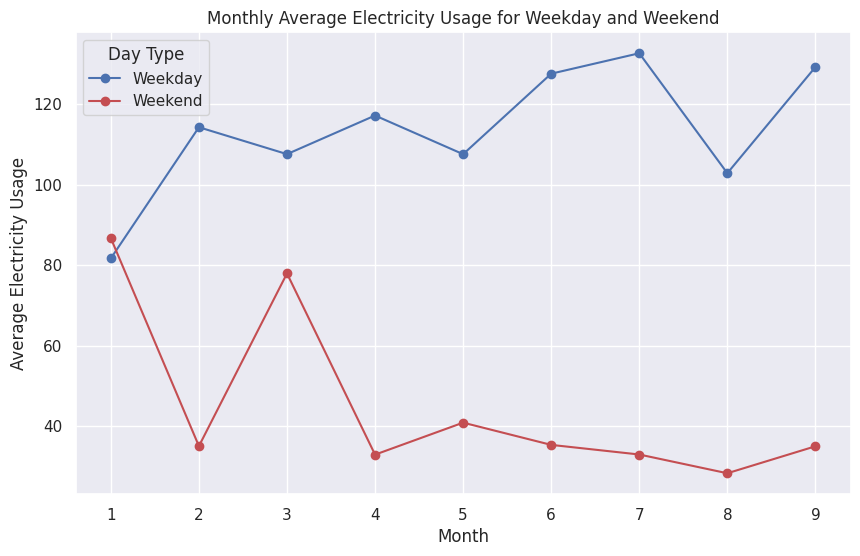

In [ ]:
# Create Line Chart
plt.figure(figsize=(10, 6))
plt.plot(df_c_monthly_average_pivot_table.index, df_c_monthly_average_pivot_table['Weekday'], marker='o', color='b', label='Weekday')
plt.plot(df_c_monthly_average_pivot_table.index, df_c_monthly_average_pivot_table['Weekend'], marker='o', color='r', label='Weekend')

plt.title("Monthly Average Electricity Usage for Weekday and Weekend")
plt.xlabel("Month")
plt.ylabel("Average Electricity Usage")
plt.legend(title="Day Type")
plt.grid(True)
plt.show()

### Average of Peak Electricity Usage for Morning and Afternoon

<ipython-input-49-6b42c906e178>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_monthly_time['afternoon/morning'] = df2_monthly_time['hour'].apply(lambda x: 'morning' if 0 <= x <12 else ('afternoon' if 12<=x<24 else None))
<ipython-input-49-6b42c906e178>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_monthly_time['Month'] = df2_monthly_time.index.month


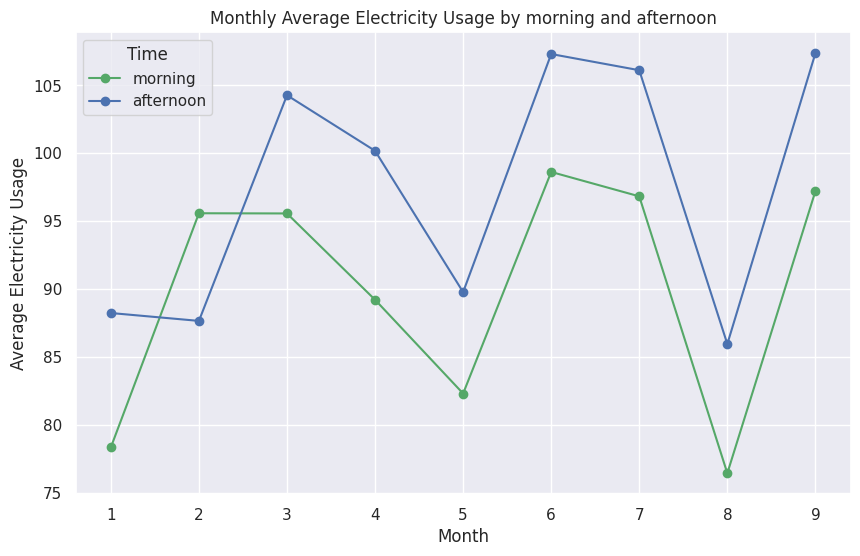

In [ ]:
df2_monthly_time = df_c[['date', 'hour', 'average']]
df2_monthly_time.index = index_column
df2_monthly_time.index.names = ['Date']
df2_monthly_time['afternoon/morning'] = df2_monthly_time['hour'].apply(lambda x: 'morning' if 0 <= x <12 else ('afternoon' if 12<=x<24 else None))
df2_monthly_time['Month'] = df2_monthly_time.index.month
df2_monthly_time_pivot_table = df2_monthly_time.pivot_table(values='average', index='Month', columns='afternoon/morning', aggfunc='mean')
df2_monthly_time_pivot_table.columns = ['afternoon', 'morning']
plt.figure(figsize=(10, 6))
plt.plot(df2_monthly_time_pivot_table.index, df2_monthly_time_pivot_table['morning'], marker='o', color='g', label='morning')
plt.plot(df2_monthly_time_pivot_table.index, df2_monthly_time_pivot_table['afternoon'], marker='o', color='b', label='afternoon')
plt.title("Monthly Average Electricity Usage by morning and afternoon")
plt.xlabel("Month")
plt.ylabel("Average Electricity Usage")
plt.legend(title="Time")
plt.grid(True)
plt.show()

### Average of Peak Electricity Usage by Season

In [ ]:
def classify_season(month):
    if month in [1, 2]:
        return 'Winter'
    elif month in [3, 4, 5, 9]:
        return 'Spring/Fall'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'None'

In [ ]:
df2 = df_c.copy()
df2['season'] = df2['m'].apply(classify_season)
df2.head()

,date,hour,min_15,min_30,min_45,min_60,average,production,temperature,wind_speed,humidity,precipitation,electricity_cost,day,d,m,factory_staff,labor_cost,season
0,20210101,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5,Winter
1,20210101,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5,Winter
2,20210101,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5,Winter
3,20210101,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.0,1.5,Winter
4,20210101,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.0,1.5,Winter


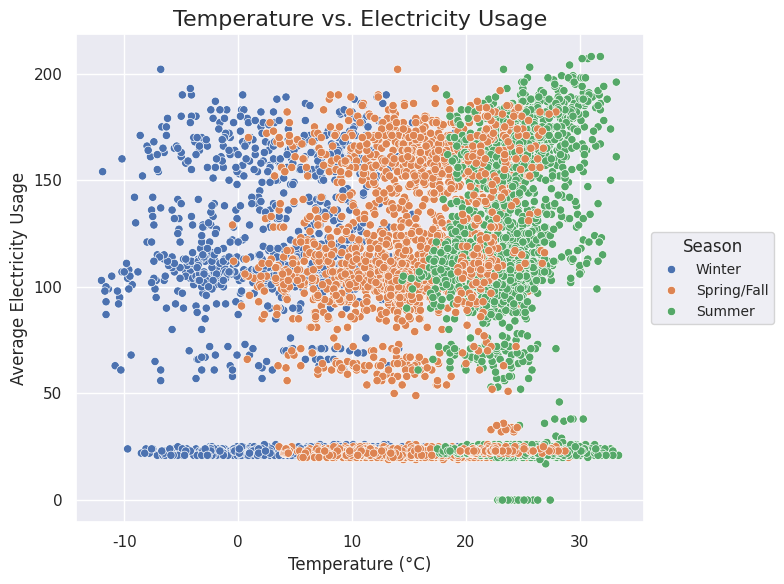

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='average', hue='season', data=df2)
plt.title('Temperature vs. Electricity Usage', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Average Electricity Usage', fontsize=12)
plt.legend(title='Season', fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# **3. Prediction**

## **Basic model**
- Random Forest
- Logistic Regression
- Regression Tree

In [ ]:
df3 = origin[['평균', '기온', '풍속', '습도', '강수량', 'd', 'm', '시간' ]]

trans = df3.rename(columns=
 {"평균" : "Average Peak Consumption in 1 hour",
  "기온" : "Temperature",
  "풍속" : "Wind Speed",
  "습도" : "Humidity",
  "강수량" : "Precipitation",
  "시간" : "Time"})
trans

,Average Peak Consumption in 1 hour,Temperature,Wind Speed,Humidity,Precipitation,d,m,Time
0,61,-3.2,2.4,71,0.0,1,1,0
1,105,-4.5,1.5,77,0.0,1,1,1
2,104,-3.9,2.6,58,0.0,1,1,2
3,105,-4.1,2.6,56,0.0,1,1,3
4,107,-4.6,2.6,60,0.0,1,1,4
...,...,...,...,...,...,...,...,...
6163,153,21.7,3.6,85,9.4,14,9,19
6164,128,22.2,4.2,78,9.4,14,9,20
6165,128,22.2,4.3,76,9.4,14,9,21
6166,111,22.0,2.5,79,9.4,14,9,22


In [ ]:
index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')

trans.index = index_column
trans.index.names = ['Date']

# 'Average Peak Consumption in 1 hour'와 'Humidity' 열을 float로 변환
trans['Average Peak Consumption in 1 hour'] = trans['Average Peak Consumption in 1 hour'].apply(lambda x: float(str(x).replace(',', '').replace(' ', '')))
trans['Humidity'] = trans['Humidity'].apply(lambda x: float(str(x).replace(',', '').replace(' ', '')))




# 주말/주중 구분: weekday가 5 이상이면 주말, 그렇지 않으면 주중
def add_weekend_feature(df):
    df['weekend'] = (df.index.weekday >= 4).astype(int)  # 0: 평일, 1: 주말
    holidays = ["2021-01-01", "2021-02-11", "2021-02-12", "2021-02-13", "2021-02-14",
                "2021-03-01", "2021-05-05", "2021-05-19", "2021-06-06", "2021-08-16"]
    holidays = pd.to_datetime(holidays)
    df['holiday'] = df.index.normalize().isin(holidays).astype(int)
    return df

trans = add_weekend_feature(trans)
trans.head()

<ipython-input-54-c71a79f89b7d>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')


,Average Peak Consumption in 1 hour,Temperature,Wind Speed,Humidity,Precipitation,d,m,Time,weekend,holiday
Date,,,,,,,,,,
2021-01-01 00:00:00,61.0,-3.2,2.4,71.0,0.0,1,1,0,1,1
2021-01-01 01:00:00,105.0,-4.5,1.5,77.0,0.0,1,1,1,1,1
2021-01-01 02:00:00,104.0,-3.9,2.6,58.0,0.0,1,1,2,1,1
2021-01-01 03:00:00,105.0,-4.1,2.6,56.0,0.0,1,1,3,1,1
2021-01-01 04:00:00,107.0,-4.6,2.6,60.0,0.0,1,1,4,1,1


In [ ]:
#from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, mean_absolute_error, mean_squared_error, r2_score

X = trans.drop(['Average Peak Consumption in 1 hour'], axis=1)
y = trans['Average Peak Consumption in 1 hour'].shift(-1).dropna()
X = X[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=720 )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(4933, 9)
(4933,)
(1234, 9)
(1234,)


### Random Forest

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, PolynomialFeatures, SplineTransformer, RobustScaler

# Define individual pipelines
pipe2 = Pipeline([('mm', MinMaxScaler()),
                  ('rf', RandomForestRegressor())])
pipe3 = Pipeline([('st', StandardScaler()),
                  ('rf', RandomForestRegressor())])
pipe4 = Pipeline([('rb', RobustScaler()),
                  ('rf',RandomForestRegressor())])

pipes = {
    'mm': pipe2,
    'st': pipe3,
    'rb': pipe4,
}

pipe5 = Pipeline([('Poly', PolynomialFeatures()),
                  ('lr', RandomForestRegressor())])
pipe6 = Pipeline([('spl', SplineTransformer()),
                  ('lr', RandomForestRegressor())])
pipes['Poly'] = pipe4
pipes['spl'] = pipe5

rmse_list = []
def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    report = f"""
    Regression Report:
    -----------------
    Mean Absolute Error (MAE): {mae:.4f}
    Mean Squared Error (MSE): {mse:.4f}
    Root Mean Squared Error (RMSE): {rmse:.4f}
    R-squared (R²): {r2:.4f}
    """
    return report

# Iterate over the pipelines, fit, predict, and calculate RMSE for each
for p in pipes:
    pipes[p].fit(X_train, y_train)  # Fit the pipeline
    y_pred_p = pipes[p].predict(X_test)  # Predict on the test set
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_p))
    rmse_list.append(rmse)
    print(f'----{p}----')
    print(regression_report(y_test, y_pred_p))

----mm----

    Regression Report:
    -----------------
    Mean Absolute Error (MAE): 14.4579
    Mean Squared Error (MSE): 524.8434
    Root Mean Squared Error (RMSE): 22.9095
    R-squared (R²): 0.8401
    
----st----

    Regression Report:
    -----------------
    Mean Absolute Error (MAE): 14.4334
    Mean Squared Error (MSE): 508.9475
    Root Mean Squared Error (RMSE): 22.5599
    R-squared (R²): 0.8450
    
----rb----

    Regression Report:
    -----------------
    Mean Absolute Error (MAE): 14.5424
    Mean Squared Error (MSE): 527.2259
    Root Mean Squared Error (RMSE): 22.9614
    R-squared (R²): 0.8394
    
----Poly----

    Regression Report:
    -----------------
    Mean Absolute Error (MAE): 14.8688
    Mean Squared Error (MSE): 549.0169
    Root Mean Squared Error (RMSE): 23.4311
    R-squared (R²): 0.8328
    
----spl----

    Regression Report:
    -----------------
    Mean Absolute Error (MAE): 16.4739
    Mean Squared Error (MSE): 644.7650
    Root Mean Squa

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

rmse_scores = []

for i in range(5):
    print(f'\nRepetition {i+1}')
    rmse_scores.append([])
    cv = KFold(n_splits=5, shuffle=True, random_state=i)
    # 5-fold CV
    for k, (train_index, test_index) in enumerate(cv.split(X)):
        print(f'\tStep {k+1} in 5-CV...')
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rmse_scores[i].append([])
        # Running all different pipelines
        for p in pipes:
            pipes[p].fit(X_train, y_train)
            # Predictions
            y_pred = pipes[p].predict(X_test)
            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            rmse_scores[i][k].append(rmse)





Repetition 1
	Step 1 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 2 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 3 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 4 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 5 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]



Repetition 2
	Step 1 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 2 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 3 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 4 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 5 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]



Repetition 3
	Step 1 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 2 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 3 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 4 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 5 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]



Repetition 4
	Step 1 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 2 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 3 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 4 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 5 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]



Repetition 5
	Step 1 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 2 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 3 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 4 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 5 in 5-CV...


<ipython-input-60-c64a5846f554>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


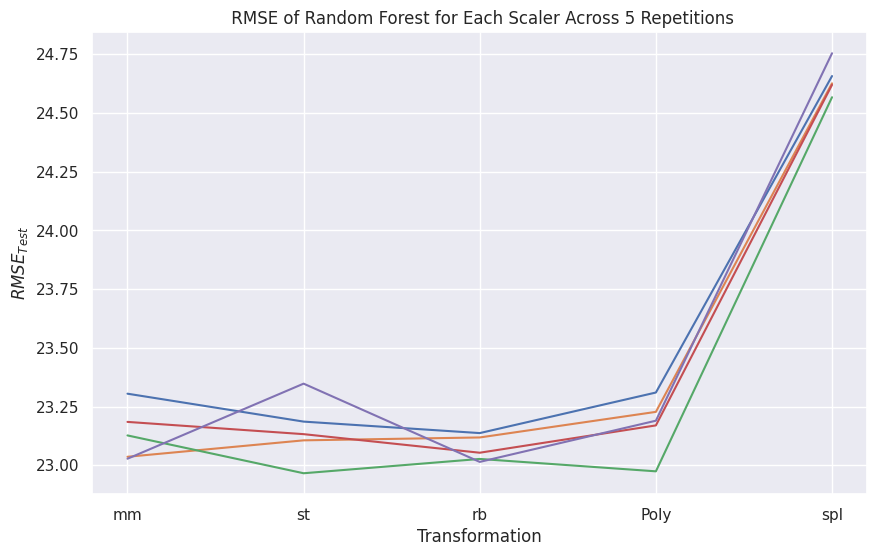

In [ ]:
# RMSE 값을 그래프에 표시
plt.figure(figsize=(10, 6))
for i in range(5):
    mean_rmse = np.array(rmse_scores[i]).mean(axis=0)
    # Lineplot 그리기
    sns.lineplot(x=pipes.keys(), y=mean_rmse)

plt.xlabel('Transformation')
plt.ylabel('$RMSE_{Test}$')
plt.title(' RMSE of Random Forest for Each Scaler Across 5 Repetitions')
plt.show()

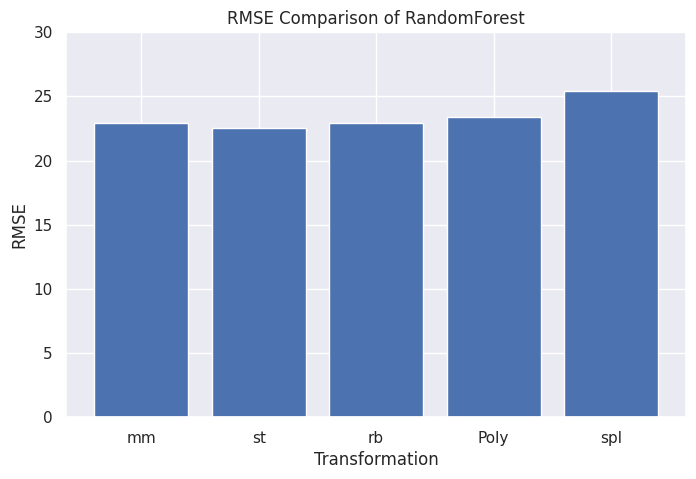

In [ ]:
# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.bar(pipes.keys(), rmse_list)
plt.title('RMSE Comparison of RandomForest')
plt.xlabel('Transformation')
plt.ylim(0,30)
plt.ylabel('RMSE')
plt.show()

In [ ]:
# 스케일러 이름이 'mm', 'st', 'rb'인 값만 조회
scalers_of_interest = ['mm', 'st', 'rb']

for scaler in scalers_of_interest:
    index = list(pipes.keys()).index(scaler)
    print(f'{scaler} RMSE: {rmse_list[index]}')  # 해당 스케일러에 대한 RMSE 출력


mm RMSE: 22.90946188104584
st RMSE: 22.559865465505727
rb RMSE: 22.96139998569511


### Logistic Regression

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

pipe2 = Pipeline([('mm', MinMaxScaler()),
                  ('lr', LogisticRegression())])
pipe3 = Pipeline([('st', StandardScaler()),
                  ('lr', LogisticRegression())])
pipe4 = Pipeline([('rb', RobustScaler()),
                  ('lr',LogisticRegression())])

pipes_lr = {
    'mm': pipe2,
    'st': pipe3,
    'rb': pipe4,
}

pipe5 = Pipeline([('Poly', PolynomialFeatures()),
                  ('lr', LogisticRegression())])
pipe6 = Pipeline([('spl', SplineTransformer()),
                  ('lr', LogisticRegression())])
pipes['Poly'] = pipe5
pipes['spl'] = pipe6

for p in pipes_lr:
    pipes[p].fit(X_train, y_train)  # Fit the pipeline
    y_pred_p = pipes[p].predict(X_test)  # Predict on the test set
    rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_p))  # RMSE 계산
    rmse_list.append(rmse_lr)
    print(f'----{p}----')
    print(regression_report(y_test, y_pred_p))

rmse_scores_lr = []

for i in range(5):
    print(f'\nRepetition {i+1}')
    rmse_scores_lr.append([])
    cv = KFold(n_splits=5, shuffle=True, random_state=i)
    # 5-fold CV
    for k, (train_index, test_index) in enumerate(cv.split(X)):
        print(f'\tStep {k+1} in 5-CV...')
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rmse_scores_lr[i].append([])
        for p in pipes:
            pipes[p].fit(X_train, y_train)
            # Predictions
            y_pred = pipes[p].predict(X_test)
            # Calculate RMSE
            rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
            rmse_scores_lr[i][k].append(rmse_lr)

----mm----

    Regression Report:
    -----------------
    Mean Absolute Error (MAE): 14.8497
    Mean Squared Error (MSE): 559.2844
    Root Mean Squared Error (RMSE): 23.6492
    R-squared (R²): 0.8301
    
----st----

    Regression Report:
    -----------------
    Mean Absolute Error (MAE): 14.6905
    Mean Squared Error (MSE): 551.2931
    Root Mean Squared Error (RMSE): 23.4796
    R-squared (R²): 0.8326
    
----rb----

    Regression Report:
    -----------------
    Mean Absolute Error (MAE): 14.9195
    Mean Squared Error (MSE): 569.5593
    Root Mean Squared Error (RMSE): 23.8654
    R-squared (R²): 0.8270
    

Repetition 1
	Step 1 in 5-CV...


<ipython-input-64-2f872b13dc00>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACH

	Step 2 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 3 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 4 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 5 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Repetition 2
	Step 1 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 2 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 3 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 4 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 5 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Repetition 3
	Step 1 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 2 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 3 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 4 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 5 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Repetition 4
	Step 1 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 2 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 3 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 4 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 5 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Repetition 5
	Step 1 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 2 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 3 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 4 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

	Step 5 in 5-CV...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

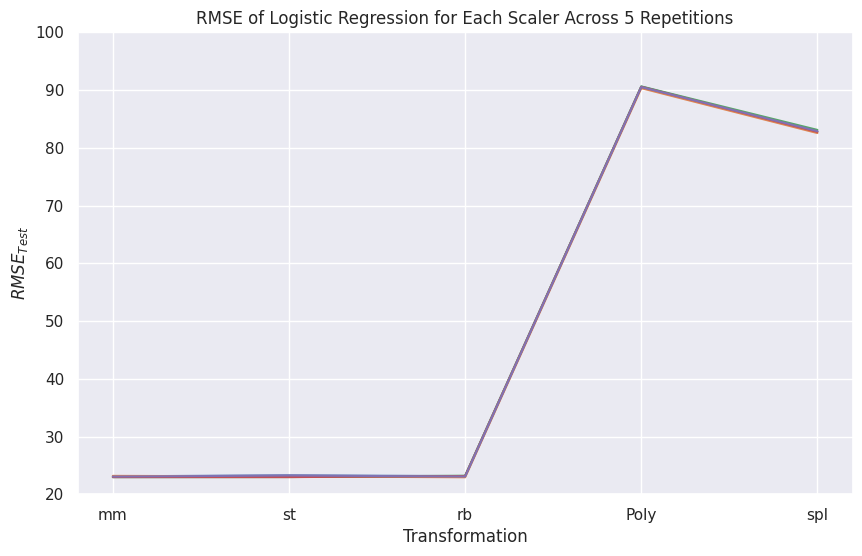

In [ ]:
# RMSE 값을 그래프에 표시
plt.figure(figsize=(10, 6))
for i in range(5):
    mean_rmse_lr = np.array(rmse_scores_lr[i]).mean(axis=0)

    # Lineplot 그리기
    sns.lineplot(x=pipes.keys(), y=mean_rmse_lr)

plt.xlabel('Transformation')
plt.ylabel('$RMSE_{Test}$')

y_min = 20
y_max = 100
plt.yticks(np.arange(y_min, y_max + 10, 10))
plt.ylim(y_min, y_max)
plt.title('RMSE of Logistic Regression for Each Scaler Across 5 Repetitions')
plt.show()

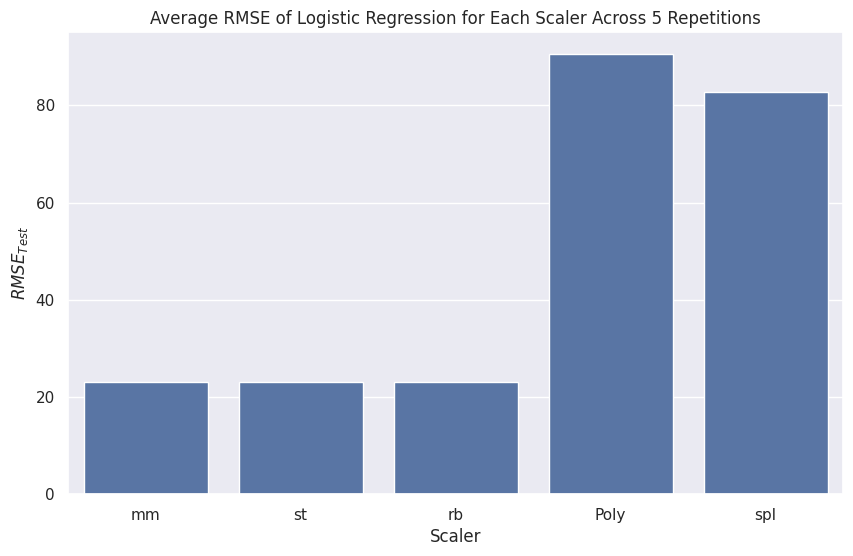

In [ ]:
# 각 스케일러별 평균 RMSE 계산 (5번의 반복 결과에서 5개 fold 평균)
mean_rmse_lr = []


for i in range(5):
    mean_rmse_fold = np.array(rmse_scores_lr[i]).mean(axis=0)
    mean_rmse_lr.append(mean_rmse_fold)


final_mean_rmse_lr = np.mean(mean_rmse_lr, axis=0)  # 5번 반복에 대한 평균 RMSE

# 데이터프레임으로 변환
mean_rmse_df_lr = pd.DataFrame({
    'Scaler': pipes.keys(),
    'Mean RMSE': final_mean_rmse_lr
})

# Barplot 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Scaler', y='Mean RMSE', data=mean_rmse_df_lr)
plt.xlabel('Scaler')
plt.ylabel('$RMSE_{Test}$')
plt.title('Average RMSE of Logistic Regression for Each Scaler Across 5 Repetitions')
plt.show()


In [ ]:
# 'mm', 'st', 'rb' 스케일러의 값만 추출
selected_scalers = ['mm', 'st', 'rb']
filtered_rmse_lr = mean_rmse_df_lr[mean_rmse_df_lr['Scaler'].isin(selected_scalers)]

# 필터링된 데이터 출력
print(filtered_rmse_lr)

  Scaler  Mean RMSE
0     mm  23.053181
1     st  23.107656
2     rb  23.103454


### Regression Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
# Store pipelines in a dictionary
pipe2 = Pipeline([('mm', MinMaxScaler()),
                  ('lr', DecisionTreeRegressor())])
pipe3 = Pipeline([('st', StandardScaler()),
                  ('lr', DecisionTreeRegressor())])
pipe4 = Pipeline([('rb', RobustScaler()),
                  ('lr', DecisionTreeRegressor())])

pipes_dt = {
    'mm': pipe2,
    'st': pipe3,
    'rb': pipe4,
}

pipe5 = Pipeline([('Poly', PolynomialFeatures()),
                  ('lr', DecisionTreeRegressor())])
pipe6 = Pipeline([('spl', SplineTransformer()),
                  ('lr', DecisionTreeRegressor())])
pipes['Poly'] = pipe5
pipes['spl'] = pipe6

for p in pipes_dt:
    pipes[p].fit(X_train, y_train)  # Fit the pipeline
    y_pred_p = pipes[p].predict(X_test)  # Predict on the test set
    rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_p))  # RMSE 계산
    rmse_list.append(rmse_dt)
    print(f'----{p}----')
    print(regression_report(y_test, y_pred_p))

rmse_scores_dt = []

for i in range(5):
    print(f'\nRepetition {i+1}')
    rmse_scores_dt.append([])
    cv = KFold(n_splits=5, shuffle=True, random_state=i)
    # 5-fold CV
    for k, (train_index, test_index) in enumerate(cv.split(X)):
        print(f'\tStep {k+1} in 5-CV...')
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rmse_scores_dt[i].append([])
        for p in pipes:
            pipes[p].fit(X_train, y_train)
            # Predictions
            y_pred = pipes[p].predict(X_test)
            # Calculate RMSE
            rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred))
            rmse_scores_dt[i][k].append(rmse_dt)

----mm----

    Regression Report:
    -----------------
    Mean Absolute Error (MAE): 14.9494
    Mean Squared Error (MSE): 561.6401
    Root Mean Squared Error (RMSE): 23.6989
    R-squared (R²): 0.8294
    
----st----

    Regression Report:
    -----------------
    Mean Absolute Error (MAE): 14.9967
    Mean Squared Error (MSE): 589.5454
    Root Mean Squared Error (RMSE): 24.2806
    R-squared (R²): 0.8210
    
----rb----

    Regression Report:
    -----------------
    Mean Absolute Error (MAE): 14.8509
    Mean Squared Error (MSE): 568.8955
    Root Mean Squared Error (RMSE): 23.8515
    R-squared (R²): 0.8272
    

Repetition 1
	Step 1 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 2 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 3 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 4 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 5 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]



Repetition 2
	Step 1 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 2 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 3 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 4 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 5 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]



Repetition 3
	Step 1 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 2 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 3 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 4 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 5 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]



Repetition 4
	Step 1 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 2 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 3 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 4 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 5 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]



Repetition 5
	Step 1 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 2 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 3 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 4 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


	Step 5 in 5-CV...


<ipython-input-68-2325175f54ed>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]


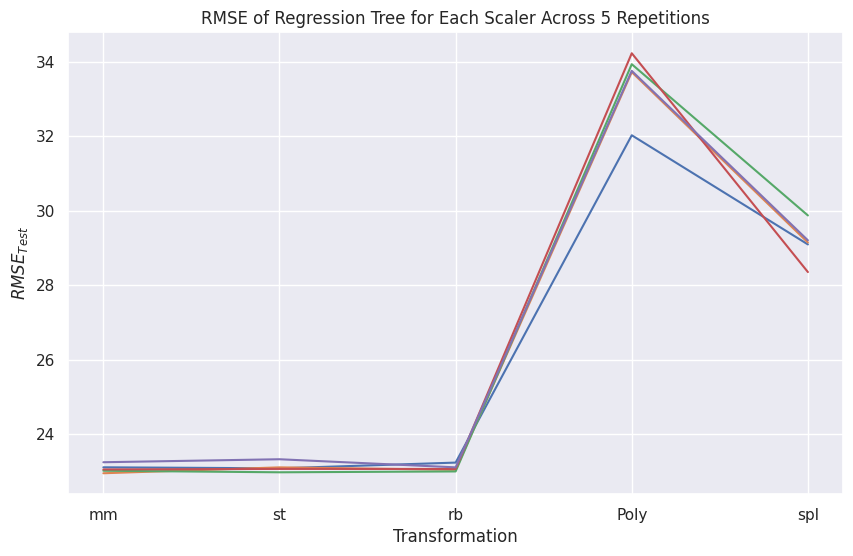

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(5):
    mean_rmse_dt = np.array(rmse_scores_dt[i]).mean(axis=0)
    # Lineplot 그리기
    sns.lineplot(x=pipes.keys(), y=mean_rmse_dt)

plt.xlabel('Transformation')
plt.ylabel('$RMSE_{Test}$')
plt.title('RMSE of Regression Tree for Each Scaler Across 5 Repetitions')
plt.show()

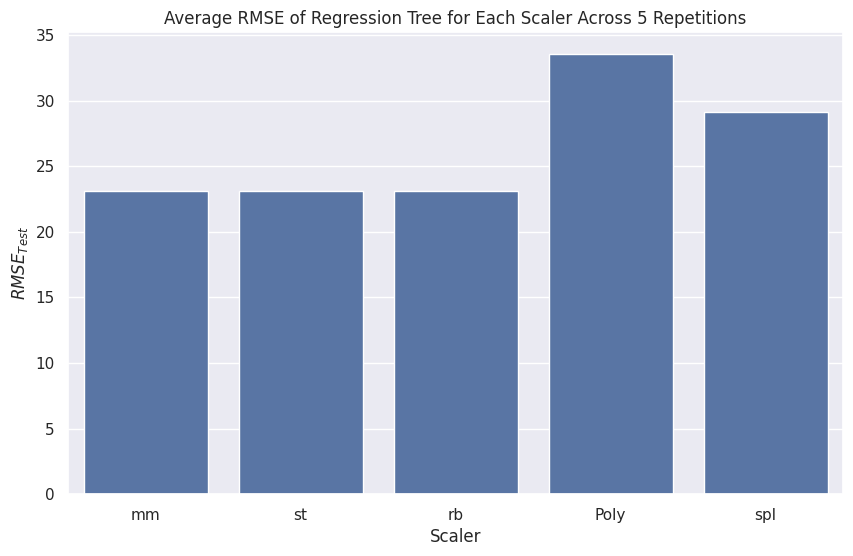

In [ ]:
# 각 스케일러별 평균 RMSE 계산 (5번의 반복 결과에서 5개 fold 평균)
mean_rmse_dt = []

for i in range(5):  # 각 반복에 대해
    mean_rmse_fold = np.array(rmse_scores_dt[i]).mean(axis=0)
    mean_rmse_dt.append(mean_rmse_fold)

# 각 스케일러에 대해 5번 반복에 대한 평균 RMSE
final_mean_rmse_dt = np.mean(mean_rmse_dt, axis=0)

# 데이터프레임으로 변환
mean_rmse_df_dt = pd.DataFrame({
    'Scaler': pipes.keys(),
    'Mean RMSE': final_mean_rmse_dt
})

# Barplot 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Scaler', y='Mean RMSE', data=mean_rmse_df_dt)
plt.xlabel('Scaler')
plt.ylabel('$RMSE_{Test}$')
plt.title('Average RMSE of Regression Tree for Each Scaler Across 5 Repetitions')
plt.show()


In [ ]:
# 'mm', 'st', 'rb' 스케일러의 값만 추출
selected_scalers = ['mm', 'st', 'rb']
filtered_rmse_df = mean_rmse_df_dt[mean_rmse_df_dt['Scaler'].isin(selected_scalers)]

# 필터링된 데이터 출력
print(filtered_rmse_df)


  Scaler  Mean RMSE
0     mm  23.077486
1     st  23.114334
2     rb  23.092684


### **Best Performance with basic model**
- Regression Tree : Robust Scaler
- Logistic Regression : Min-max Scaler
- Random Forest : Min-max Scaler

In [ ]:
pipe7 = Pipeline([('rb', RobustScaler()),
                  ('dt',DecisionTreeRegressor())])

pipe8 = Pipeline([('mm', MinMaxScaler()),
                  ('lr', LogisticRegression())])

pipe9 = Pipeline([('mm', MinMaxScaler()),
                  ('rf',RandomForestRegressor())])

In [ ]:
pipes = {
    'RT_robust': pipe7,
    'LR_minmax': pipe8,
    'RF_minmax': pipe9,
}

# 5겹 K-fold 교차 검증 설정
rmse_scores = {key: [] for key in pipes.keys()}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 5겹 K-fold로 RMSE 계산
for i, (train_index, test_index) in enumerate(cv.split(X)):
    print(f'Repetition {i + 1}')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for name, pipe in pipes.items():
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)  # 예측
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE 계산
        rmse_scores[name].append(rmse)  # RMSE 값 추가
        print(f'{name} - RMSE: {rmse}')

Repetition 1
RT_robust - RMSE: 31.383973756553296


<ipython-input-73-405b829a043f>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_minmax - RMSE: 91.69698531071201
RF_minmax - RMSE: 25.001295707103576
Repetition 2
RT_robust - RMSE: 31.135246355861625


<ipython-input-73-405b829a043f>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_minmax - RMSE: 91.58536594050956
RF_minmax - RMSE: 22.00244849348058
Repetition 3
RT_robust - RMSE: 28.74028627467097


<ipython-input-73-405b829a043f>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_minmax - RMSE: 92.21829157435164
RF_minmax - RMSE: 21.98810900720877
Repetition 4
RT_robust - RMSE: 29.22638654917533


<ipython-input-73-405b829a043f>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_minmax - RMSE: 92.21165135480378
RF_minmax - RMSE: 23.015898986653294
Repetition 5
RT_robust - RMSE: 31.67475885848073


<ipython-input-73-405b829a043f>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR_minmax - RMSE: 91.40441583636796
RF_minmax - RMSE: 23.3554633828936


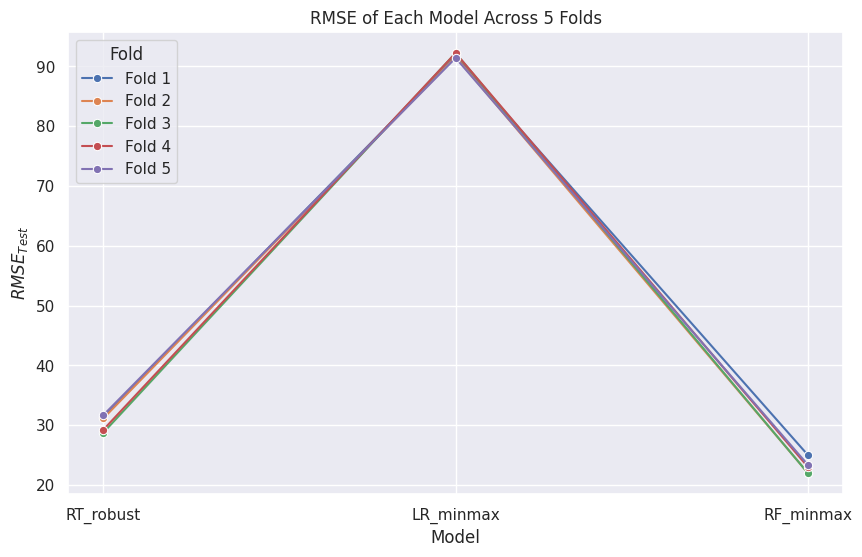

In [ ]:
# 5겹 결과를 lineplot으로 시각화
plt.figure(figsize=(10, 6))

# 각 모델별로 5개의 fold RMSE 값들을 선으로 그리기
for fold in range(5):
    fold_rmse = [rmse_scores[name][fold] for name in rmse_scores]
    sns.lineplot(x=list(rmse_scores.keys()), y=fold_rmse, label=f'Fold {fold + 1}', marker='o')

plt.xlabel('Model')
plt.ylabel('$RMSE_{Test}$')
plt.title('RMSE of Each Model Across 5 Folds')
plt.legend(title='Fold', loc='upper left')
plt.show()



---



## **Adavanced Model**
- RNN
- Prophet


### Preprocessing
- fill null values
- make time series matrix

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(rc = {"figure.figsize": (20, 10)})
df = pd.read_csv('./okm_augumented_2021.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        6168 non-null   int64  
 1   시간        6168 non-null   int64  
 2   15분       6168 non-null   int64  
 3   30분       6168 non-null   int64  
 4   45분       6168 non-null   int64  
 5   60분       6168 non-null   int64  
 6   평균        6168 non-null   int64  
 7   생산량       6168 non-null   int64  
 8   기온        6168 non-null   float64
 9   풍속        6165 non-null   float64
 10  습도        6168 non-null   int64  
 11  강수량       6167 non-null   float64
 12  전기요금(계절)  6168 non-null   float64
 13  day       6168 non-null   int64  
 14  d         6168 non-null   int64  
 15  m         6168 non-null   int64  
 16  공장인원      6151 non-null   float64
 17  인건비       6168 non-null   float64
dtypes: float64(6), int64(12)
memory usage: 867.5 KB


In [ ]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        6168 non-null   int64  
 1   시간        6168 non-null   int64  
 2   15분       6168 non-null   int64  
 3   30분       6168 non-null   int64  
 4   45분       6168 non-null   int64  
 5   60분       6168 non-null   int64  
 6   평균        6168 non-null   int64  
 7   생산량       6168 non-null   int64  
 8   기온        6168 non-null   float64
 9   풍속        6168 non-null   float64
 10  습도        6168 non-null   int64  
 11  강수량       6168 non-null   float64
 12  전기요금(계절)  6168 non-null   float64
 13  day       6168 non-null   int64  
 14  d         6168 non-null   int64  
 15  m         6168 non-null   int64  
 16  공장인원      6168 non-null   float64
 17  인건비       6168 non-null   float64
dtypes: float64(6), int64(12)
memory usage: 867.5 KB


In [ ]:
df1 =df.drop(columns = ["생산량", "풍속", "습도", "강수량", "전기요금(계절)", "day", "d", "m", "공장인원", "인건비"], axis =1, inplace=True)

In [ ]:
df1 = df.rename(columns= {"15분" : "Peak Consumption in 15 minute",
"30분" : "Peak Consumption in 30 minute",
"45분" : "Peak Consumption in 45 minute",
"60분" : "Peak Consumption in 60 minute",
"평균" : "Average Peak Consumption in 1 hour",
"기온" : "Temperature"})

index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')

df1.index = index_column
df1.index.names = ['Date']

df1['Peak Consumption in 15 minute'] = [float(str(val).replace('.','').replace(',','.')) for val in df1['Peak Consumption in 15 minute'].values]
df1['Peak Consumption in 30 minute'] = [float(str(val).replace('.','').replace(',','.')) for val in df1['Peak Consumption in 30 minute'].values]
df1['Peak Consumption in 45 minute'] = [float(str(val).replace('.','').replace(',','.')) for val in df1['Peak Consumption in 45 minute'].values]
df1['Peak Consumption in 60 minute'] = [float(str(val).replace('.','').replace(',','.')) for val in df1['Peak Consumption in 60 minute'].values]
df1['Average Peak Consumption in 1 hour'] = [float(str(val).replace('.','').replace(',','.')) for val in df1['Average Peak Consumption in 1 hour'].values]
df1.head()

<ipython-input-79-79cf30b56c38>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_column = pd.date_range(start ='2021-01-01 00:00', end ='2021-09-14 23:00', freq ='H')


,날짜,시간,Peak Consumption in 15 minute,Peak Consumption in 30 minute,Peak Consumption in 45 minute,Peak Consumption in 60 minute,Average Peak Consumption in 1 hour,Temperature
Date,,,,,,,,
2021-01-01 00:00:00,20210101,0,62.0,61.0,61.0,61.0,61.0,-3.2
2021-01-01 01:00:00,20210101,1,96.0,93.0,116.0,113.0,105.0,-4.5
2021-01-01 02:00:00,20210101,2,106.0,96.0,106.0,107.0,104.0,-3.9
2021-01-01 03:00:00,20210101,3,92.0,110.0,110.0,109.0,105.0,-4.1
2021-01-01 04:00:00,20210101,4,108.0,105.0,106.0,108.0,107.0,-4.6


In [ ]:
df1.index = pd.to_datetime(df1.index)
df1['Holidays'] = np.zeros(len(df))
holidays = ["2021-01-01", "2021-02-11", "2021-02-12","2021-03-01", "2021-05-05", "2021-05-19", "2021-08-16"]

In [ ]:
for gun,j in df.iterrows():
 if str(gun)[:10] in holidays:
  df1["Holidays"].loc[gun] =1
df1.head(5)

,날짜,시간,Peak Consumption in 15 minute,Peak Consumption in 30 minute,Peak Consumption in 45 minute,Peak Consumption in 60 minute,Average Peak Consumption in 1 hour,Temperature,Holidays
Date,,,,,,,,,
2021-01-01 00:00:00,20210101,0,62.0,61.0,61.0,61.0,61.0,-3.2,0.0
2021-01-01 01:00:00,20210101,1,96.0,93.0,116.0,113.0,105.0,-4.5,0.0
2021-01-01 02:00:00,20210101,2,106.0,96.0,106.0,107.0,104.0,-3.9,0.0
2021-01-01 03:00:00,20210101,3,92.0,110.0,110.0,109.0,105.0,-4.1,0.0
2021-01-01 04:00:00,20210101,4,108.0,105.0,106.0,108.0,107.0,-4.6,0.0


In [ ]:
df1.to_csv("daily_data_seasonality.csv", index =True)

In [ ]:
daily_data =pd.DataFrame(pd.read_csv("daily_data_seasonality.csv", header =0, index_col =0, parse_dates =True))
daily_data_peak = daily_data[["Average Peak Consumption in 1 hour"]]
daily_data_peak.shape

(6168, 1)

In [ ]:
n_times_advance =1
n_times_windows =168

for k in range(n_times_advance, n_times_advance + n_times_windows):
 daily_data_peak["Average Peak Consumption in 1 hour_t-%i" % k] = np.zeros(len(daily_data_peak["Average Peak Consumption in 1 hour"]))
daily_data_peak.shape

<ipython-input-84-75048b735251>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_peak["Average Peak Consumption in 1 hour_t-%i" % k] = np.zeros(len(daily_data_peak["Average Peak Consumption in 1 hour"]))
<ipython-input-84-75048b735251>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_peak["Average Peak Consumption in 1 hour_t-%i" % k] = np.zeros(len(daily_data_peak["Average Peak Consumption in 1 hour"]))
<ipython-input-84-75048b735251>:5: SettingWithCopyWarning: 
A value is trying to b

(6168, 169)

In [ ]:
# 벡터화된 연산을 사용
for j in range(n_times_advance, n_times_advance + n_times_windows):
    daily_data_peak[f"Average Peak Consumption in 1 hour_t-{j}"].iloc[j:] = daily_data_peak["Average Peak Consumption in 1 hour"].iloc[:-j].values
display(daily_data_peak)

<ipython-input-85-62f1afa71e90>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  daily_data_peak[f"Average Peak Consumption in 1 hour_t-{j}"].iloc[j:] = daily_data_peak["Average Peak Consumption in 1 hour"].iloc[:-j].values
<ipython-input-85

,Average Peak Consumption in 1 hour,Average Peak Consumption in 1 hour_t-1,Average Peak Consumption in 1 hour_t-2,Average Peak Consumption in 1 hour_t-3,Average Peak Consumption in 1 hour_t-4,Average Peak Consumption in 1 hour_t-5,Average Peak Consumption in 1 hour_t-6,Average Peak Consumption in 1 hour_t-7,Average Peak Consumption in 1 hour_t-8,Average Peak Consumption in 1 hour_t-9,...,Average Peak Consumption in 1 hour_t-159,Average Peak Consumption in 1 hour_t-160,Average Peak Consumption in 1 hour_t-161,Average Peak Consumption in 1 hour_t-162,Average Peak Consumption in 1 hour_t-163,Average Peak Consumption in 1 hour_t-164,Average Peak Consumption in 1 hour_t-165,Average Peak Consumption in 1 hour_t-166,Average Peak Consumption in 1 hour_t-167,Average Peak Consumption in 1 hour_t-168
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 01:00:00,105.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 02:00:00,104.0,105.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 03:00:00,105.0,104.0,105.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-01 04:00:00,107.0,105.0,104.0,105.0,61.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-14 19:00:00,153.0,158.0,123.0,160.0,161.0,158.0,163.0,118.0,170.0,152.0,...,113.0,112.0,118.0,110.0,72.0,111.0,115.0,131.0,134.0,152.0
2021-09-14 20:00:00,128.0,153.0,158.0,123.0,160.0,161.0,158.0,163.0,118.0,170.0,...,97.0,113.0,112.0,118.0,110.0,72.0,111.0,115.0,131.0,134.0
2021-09-14 21:00:00,128.0,128.0,153.0,158.0,123.0,160.0,161.0,158.0,163.0,118.0,...,118.0,97.0,113.0,112.0,118.0,110.0,72.0,111.0,115.0,131.0


In [ ]:
daily_data_peak = daily_data_peak.iloc[n_times_advance + n_times_windows:]
print(daily_data_peak.shape)
daily_data_peak.to_csv("daily_data_seasonality_168.csv", index = True)

(5999, 169)


### Modeling
- X : 'Average Peak Consumption in 1 hour' [t-1]~[t-168], Weekend, Holiday
- y : 'Average Peak Consumption in 1 hour' [t]

In [ ]:
import numpy as np
import pandas as pd

daily_data_168 = pd.read_csv("daily_data_seasonality_168.csv", header=0, index_col=0, parse_dates = True)
daily_data_168.rename(columns={'Average Peak Consumption in 1 hour': 'y'}, inplace=True)  # Rename columns
daily_data_168.head(3)

length_train_168 =len(daily_data_168) -336

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures, SplineTransformer
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# train/test split
train_weekend = daily_data_168[:length_train_168]
test_weekend = daily_data_168[-336:]

def add_weekhol_feature(df):
    df['weekend'] = (df.index.weekday >= 4).astype(int)  # 0: 평일, 1: 주말
    holidays = ["2021-01-01", "2021-02-11", "2021-02-12", "2021-02-13", "2021-02-14",
                "2021-03-01", "2021-05-05", "2021-05-19", "2021-06-06", "2021-08-16"]
    holidays = pd.to_datetime(holidays)
    # 날짜만 비교하도록 수정
    df['holiday'] = df.index.normalize().isin(holidays).astype(int)
    return df

# 주말/휴일 특성을 먼저 추가
train_weekend = add_weekhol_feature(train_weekend)
test_weekend = add_weekhol_feature(test_weekend)

# 스케일러 리스트 정의
scalers = [
    MinMaxScaler(),
    StandardScaler(),
    RobustScaler()
]

# 스케일러와 데이터 전처리 반복
train_X_weekend = []
test_X_weekend = []
train_Y_weekend = []
test_Y_weekend = []
train_X_input_weekend = []

for scaler in scalers:
    # 스케일링 적용
    train_scaled = scaler.fit_transform(train_weekend)
    test_scaled = scaler.transform(test_weekend)

    # 스케일링된 데이터를 데이터프레임으로 변환
    train_scaled_df = pd.DataFrame(train_scaled, index=train_weekend.index, columns=train_weekend.columns)
    test_scaled_df = pd.DataFrame(test_scaled, index=test_weekend.index, columns=test_weekend.columns)

    # X와 Y 분리
    X_train_weekend = train_scaled_df.drop('y', axis=1).values
    X_test_weekend = test_scaled_df.drop('y', axis=1).values
    Y_train_weekend = train_scaled_df['y'].values
    Y_test_weekend = test_scaled_df['y'].values

    # 필요한 특성만 선택 (168개)
    X_train_selected = X_train_weekend[:, :168]

    # 주말, 휴일 특성 추가 (마지막 두 열)
    weekend_holiday = X_train_weekend[:, -2:]

    # 각 시간대별로 주말, 휴일 정보 복제
    weekend_holiday_repeated = np.repeat(weekend_holiday[:, np.newaxis, :], 24, axis=1)

    # 기본 특성을 reshape
    base_features = X_train_selected.reshape(-1, 24, 7)

    # 최종 형태로 결합
    reshaped_X = np.concatenate([base_features, weekend_holiday_repeated], axis=2)

    print("Final shape:", reshaped_X.shape)

    train_X_weekend.append(X_train_weekend)
    test_X_weekend.append(X_test_weekend)
    train_Y_weekend.append(Y_train_weekend)
    test_Y_weekend.append(Y_test_weekend)
    train_X_input_weekend.append(reshaped_X)


<ipython-input-91-ff9e0786ed6f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekend'] = (df.index.weekday >= 4).astype(int)  # 0: 평일, 1: 주말
<ipython-input-91-ff9e0786ed6f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['holiday'] = df.index.normalize().isin(holidays).astype(int)
<ipython-input-91-ff9e0786ed6f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Final shape: (5663, 24, 9)
Final shape: (5663, 24, 9)
Final shape: (5663, 24, 9)


### RNN

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN, Flatten

# RNN 모델 정의 및 학습
model_168 = Sequential()
model_168.add(SimpleRNN(50, input_shape=(24, 9)))
model_168.add(Flatten())
model_168.add(Dense(1))
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_168.compile(loss='mean_squared_error', optimizer=opt)

# 각 스케일러에 대해 모델 학습
for i, scaler in enumerate(scalers):
    model_168.fit(train_X_input_weekend[i], train_Y_weekend[i], epochs=100)
    print(f"Model trained with {scaler.__class__.__name__}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1653
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0451
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0397
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0379
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0345
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0314
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0302
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0286
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0285
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0255
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0225
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0207
Epoch 13/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0210
Epoch 14/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0190
Epoch 15/100
177/177 ━━━━━━━━━━━━━━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predictions saved for MinMaxScaler with RMSE: 40.681604819739476
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<ipython-input-93-ea319c9a5603>:45: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_column = pd.date_range(start='2021-09-01 00:00', end='2021-09-14 23:00', freq='H')
<ipython-input-93-ea319c9a5603>:45: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_column = pd.date_range(start='2021-09-01 00:00', end='2021-09-14 23:00', freq='H')


Predictions saved for StandardScaler with RMSE: 25.820512285642103
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predictions saved for RobustScaler with RMSE: 12.098754179328338


<ipython-input-93-ea319c9a5603>:45: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_column = pd.date_range(start='2021-09-01 00:00', end='2021-09-14 23:00', freq='H')


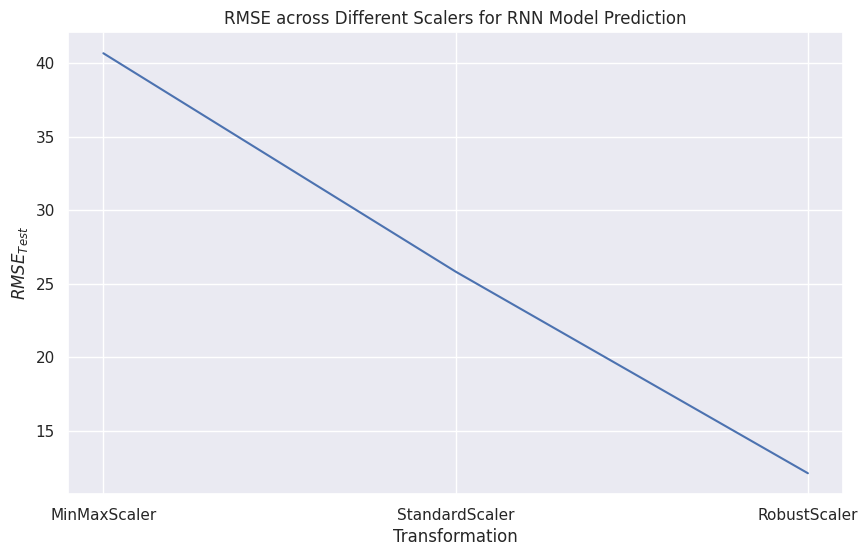

In [ ]:
# RMSE 값을 저장할 리스트
rmse_scores = []
for i, scaler in enumerate(scalers):
    # 테스트 데이터 전처리
    X_test = test_X_weekend[i]

    # 기본 특성만 선택 (처음 168개)
    X_test_selected = X_test[:, :168]

    # 주말, 휴일 특성 (마지막 2개 열)
    weekend_holiday_test = X_test[:, -2:]

    # 주말, 휴일 정보를 각 시간대별로 복제
    weekend_holiday_repeated_test = np.repeat(weekend_holiday_test[:, np.newaxis, :], 24, axis=1)

    # 기본 특성을 reshape
    base_features_test = X_test_selected.reshape(336, 24, 7)

    # 최종 형태로 결합
    X_test_reshaped = np.concatenate([base_features_test, weekend_holiday_repeated_test], axis=2)

    # 예측 수행
    preds = model_168.predict(X_test_reshaped)

    # 예측값에 빈 열을 추가하여 shape 맞추기 (336, 1 -> 336, 171)
    preds_padded = np.zeros((336, 171))
    preds_padded[:, 0] = preds[:, 0]  # 예측값 넣기
    preds_padded[:, 1:] = X_test  # 나머지 주말/휴일 특성 포함

    # 예측 결과를 역변환
    preds_inverse = scaler.inverse_transform(preds_padded)

    # 예측 결과에서 실제 예측 값만 추출
    data_predicted = preds_inverse[:, 0]

    # 실제값은 원본 데이터에서 가져오기 (역변환 전 실제값)
    data_original = daily_data_peak[["Average Peak Consumption in 1 hour"]]
    compare_result = pd.DataFrame(np.array(data_original['Average Peak Consumption in 1 hour'][-336:]), columns=['Average Consumption (1 hour)'])

    # 예측값과 실제값 비교하여 RMSE 계산
    rmse = np.sqrt(mean_squared_error(compare_result['Average Consumption (1 hour)'], data_predicted))
    rmse_scores.append(rmse)

    # 예측 결과 CSV 파일로 저장
    index_column = pd.date_range(start='2021-09-01 00:00', end='2021-09-14 23:00', freq='H')
    best_pred = pd.DataFrame(data=data_predicted, index=index_column)
    best_pred.rename(columns={0: "forecasting"}, inplace=True)
    best_pred.to_csv(f"the_best_rnn_pred_{scaler.__class__.__name__}.csv", index=True)

    print(f"Predictions saved for {scaler.__class__.__name__} with RMSE: {rmse}")



# RMSE plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=[scaler.__class__.__name__ for scaler in scalers], y=rmse_scores)

plt.xlabel('Transformation')
plt.ylabel('$RMSE_{Test}$')
plt.title('RMSE across Different Scalers for RNN Model Prediction')
plt.show()

### Predict
- pred vs original value

In [ ]:
daily_data_peak = pd.read_csv("daily_data_seasonality.csv", header=0, index_col=0, parse_dates=True)

index_column = pd.date_range(start ='2021-09-01 00:00', end ='2021-09-14 23:00', freq ='H')

import pandas as pd

# 예측 결과 파일 읽어오기
best_pred_168_weekend = pd.read_csv("the_best_rnn_pred_RobustScaler.csv", index_col=0)

# 실제값 데이터 로드
daily_data_peak = pd.read_csv("daily_data_seasonality.csv", header=0, index_col=0, parse_dates=True)

# 실제값과 예측값 비교를 위한 DataFrame 생성
index_column = pd.date_range(start='2021-09-01 00:00', end='2021-09-14 23:00', freq='H')
data_original = daily_data_peak[["Average Peak Consumption in 1 hour"]]
compare_result_weekend = pd.DataFrame(index=index_column)
compare_result_weekend['Average Peak Consumption in 1 hour'] = data_original['Average Peak Consumption in 1 hour'][-336:].values
compare_result_weekend['forecasting'] = best_pred_168_weekend['forecasting'].values

# 결과 출력
print(compare_result_weekend.head())



                     Average Peak Consumption in 1 hour  forecasting
2021-09-01 00:00:00                                74.0    73.380698
2021-09-01 01:00:00                               109.0   101.215272
2021-09-01 02:00:00                               114.0   104.523048
2021-09-01 03:00:00                                99.0   102.277233
2021-09-01 04:00:00                               115.0   108.590417


<ipython-input-94-e70a646b5149>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_column = pd.date_range(start ='2021-09-01 00:00', end ='2021-09-14 23:00', freq ='H')
<ipython-input-94-e70a646b5149>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_column = pd.date_range(start='2021-09-01 00:00', end='2021-09-14 23:00', freq='H')


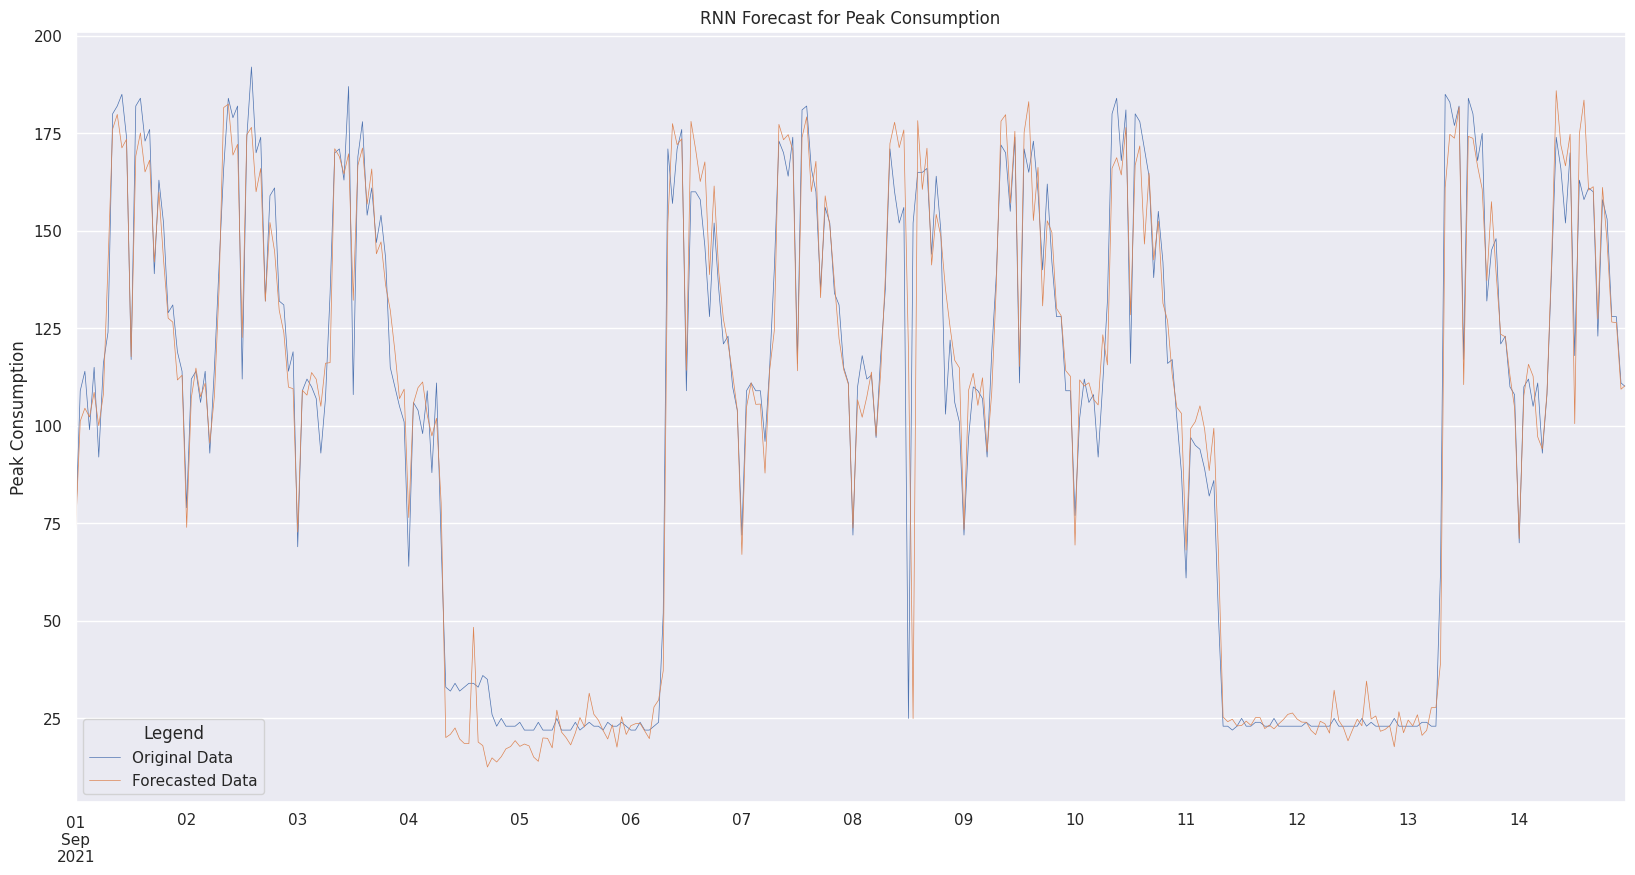

In [ ]:
sns.set(rc = {"figure.figsize": (20, 10)})
compare_result_weekend.plot(linewidth=0.5)
plt.title("RNN Forecast for Peak Consumption")
plt.ylabel("Peak Consumption")
plt.legend(labels=['Original Data', 'Forecasted Data'], title='Legend', loc='lower left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# RMSE
rmse = np.sqrt(mean_squared_error(compare_result_weekend['Average Peak Consumption in 1 hour'],
                                compare_result_weekend['forecasting']))

# MAE
mae = mean_absolute_error(compare_result_weekend['Average Peak Consumption in 1 hour'],
                         compare_result_weekend['forecasting'])

# R²
r2 = r2_score(compare_result_weekend['Average Peak Consumption in 1 hour'],
              compare_result_weekend['forecasting'])

# MAPE
mape = np.mean(np.abs((compare_result_weekend['Average Peak Consumption in 1 hour'] -
                       compare_result_weekend['forecasting']) /
                       compare_result_weekend['Average Peak Consumption in 1 hour'])) * 100

# 평균값 대비 RMSE 비율
mean_actual = compare_result_weekend['Average Peak Consumption in 1 hour'].mean()
rmse_ratio = (rmse / mean_actual) * 100

print(f"주말 학습 모델 평가 지표 결과:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"원본 데이터 평균값: {mean_actual:.2f}")
print(f"RMSE/평균값 비율: {(rmse/mean_actual*100):.2f}%")

주말 학습 모델 평가 지표 결과:
RMSE: 12.10
MAE: 6.90
R²: 0.9540
MAPE: 9.83%
원본 데이터 평균값: 102.29
RMSE/평균값 비율: 11.83%


### **Prophet**
-

In [ ]:
pip install prophet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
daily_data_168 = pd.read_csv("daily_data_seasonality_168.csv", header=0, index_col=0, parse_dates=True)

# Reset index and ensure the 'Date' column is used as 'ds'
daily_data_168 = daily_data_168.reset_index()
daily_data_168.rename(columns={'Date': 'ds', 'Average Peak Consumption in 1 hour': 'y'}, inplace=True)
daily_data_168.head(3)

,ds,y,Average Peak Consumption in 1 hour_t-1,Average Peak Consumption in 1 hour_t-2,Average Peak Consumption in 1 hour_t-3,Average Peak Consumption in 1 hour_t-4,Average Peak Consumption in 1 hour_t-5,Average Peak Consumption in 1 hour_t-6,Average Peak Consumption in 1 hour_t-7,Average Peak Consumption in 1 hour_t-8,...,Average Peak Consumption in 1 hour_t-159,Average Peak Consumption in 1 hour_t-160,Average Peak Consumption in 1 hour_t-161,Average Peak Consumption in 1 hour_t-162,Average Peak Consumption in 1 hour_t-163,Average Peak Consumption in 1 hour_t-164,Average Peak Consumption in 1 hour_t-165,Average Peak Consumption in 1 hour_t-166,Average Peak Consumption in 1 hour_t-167,Average Peak Consumption in 1 hour_t-168
0,2021-01-08 01:00:00,99.0,63.0,98.0,95.0,111.0,108.0,130.0,152.0,136.0,...,22.0,22.0,24.0,61.0,107.0,92.0,107.0,105.0,104.0,105.0
1,2021-01-08 02:00:00,103.0,99.0,63.0,98.0,95.0,111.0,108.0,130.0,152.0,...,25.0,22.0,22.0,24.0,61.0,107.0,92.0,107.0,105.0,104.0
2,2021-01-08 03:00:00,100.0,103.0,99.0,63.0,98.0,95.0,111.0,108.0,130.0,...,22.0,25.0,22.0,22.0,24.0,61.0,107.0,92.0,107.0,105.0


<ipython-input-99-967d286b44ae>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['hour'] = train['ds'].dt.hour
<ipython-input-99-967d286b44ae>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['hour'] = test['ds'].dt.hour
<ipython-input-99-967d286b44ae>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

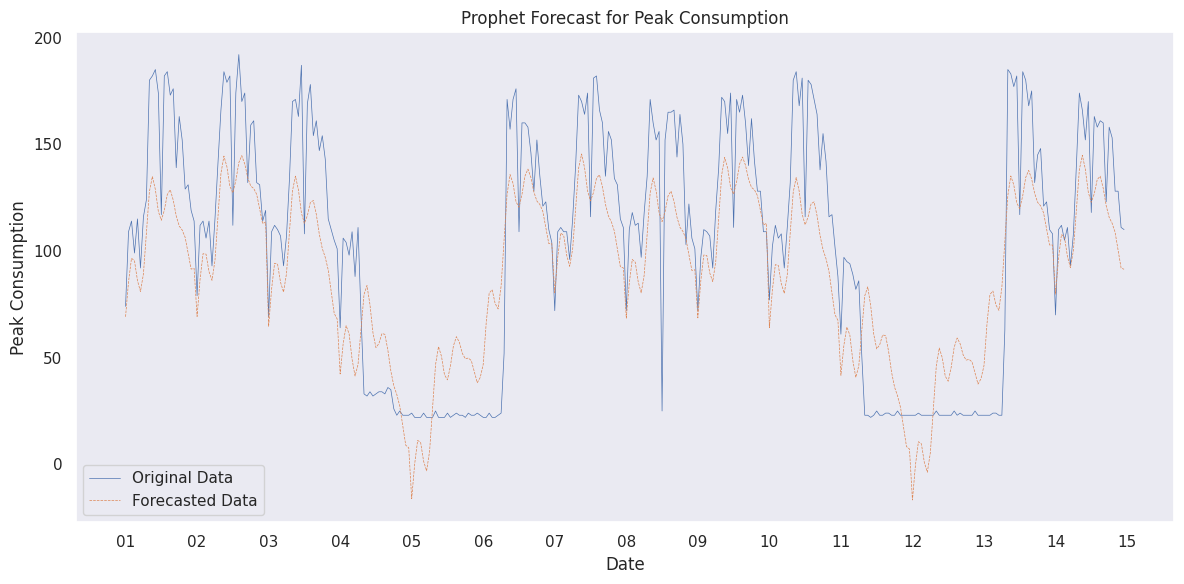

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

sns.set(rc = {"figure.figsize": (12, 8)})
sns.set_style("darkgrid")

# Train/Test Split
length_train_168 = len(daily_data_168) - 336
train = daily_data_168.iloc[:length_train_168]
test = daily_data_168.iloc[length_train_168:]

# Add hour and weekend/holiday features
train['hour'] = train['ds'].dt.hour
test['hour'] = test['ds'].dt.hour
holidays = ["2021-01-01", "2021-02-11", "2021-02-12", "2021-02-13", "2021-02-14",
            "2021-03-01", "2021-05-05", "2021-05-19", "2021-06-06", "2021-08-16"]
train['weekend_or_holiday'] = ((train['ds'].dt.weekday >= 4) | (train['ds'].dt.strftime('%Y-%m-%d').isin(holidays))).astype(int)
test['weekend_or_holiday'] = ((test['ds'].dt.weekday >= 4) | (test['ds'].dt.strftime('%Y-%m-%d').isin(holidays))).astype(int)

# Scaling
scaler_168 = MinMaxScaler(feature_range=(0, 1))
train[['y']] = scaler_168.fit_transform(train[['y']])
test[['y']] = scaler_168.transform(test[['y']])

# Fit Prophet Model with Hour and Weekend/Holiday as Regressors
model = Prophet()
model.add_regressor('hour')
model.add_regressor('weekend_or_holiday')
model.fit(train)

# Create a DataFrame for future predictions
future = test[['ds', 'hour', 'weekend_or_holiday']]

# Forecast using Prophet
forecast = model.predict(future)

# Inverse transform predictions
forecast['yhat_rescaled'] = scaler_168.inverse_transform(forecast[['yhat']])
test['y_rescaled'] = scaler_168.inverse_transform(test[['y']])

# Combine actual and predicted values
compare_result = pd.DataFrame({
    'Original': test['y_rescaled'].values,
    'Forecasting': forecast['yhat_rescaled'].values
}, index=test['ds'])

# Save the results
compare_result.to_csv("prophet_forecast_with_hour_and_holidays.csv", index=True)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(compare_result.index, compare_result['Original'], label="Original Data", linewidth=0.5)
plt.plot(compare_result.index, compare_result['Forecasting'], label="Forecasted Data", linestyle='--', linewidth=0.5)
plt.title("Prophet Forecast for Peak Consumption")
plt.xlabel("Date")
plt.ylabel("Peak Consumption")

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%d"))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=1))

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Evaluation Metrics
# RMSE
rmse = np.sqrt(mean_squared_error(compare_result['Original'], compare_result['Forecasting']))

# MAE
mae = mean_absolute_error(compare_result['Original'], compare_result['Forecasting'])

# R²
r2 = r2_score(compare_result['Original'], compare_result['Forecasting'])

# MAPE
mape = np.mean(np.abs((compare_result['Original'] - compare_result['Forecasting']) /
                      compare_result['Original'].replace(0, np.nan))) * 100

# Mean value and RMSE ratio
mean_actual = compare_result['Original'].mean()
rmse_ratio = (rmse / mean_actual) * 100

# Print results
print(f"Prophet 모델 평가 지표 결과 (Hour 및 주말/공휴일 반영):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"원본 데이터 평균값: {mean_actual:.2f}")
print(f"RMSE/평균값 비율: {rmse_ratio:.2f}%")

Prophet 모델 평가 지표 결과 (Hour 및 주말/공휴일 반영):
RMSE: 31.90
MAE: 27.26
R²: 0.6802
MAPE: 47.56%
원본 데이터 평균값: 102.29
RMSE/평균값 비율: 31.18%


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, PolynomialFeatures, SplineTransformer
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare Custom Prophet Transformer
class ProphetTransformer:
    def __init__(self, periods=30, threshold=50):
        self.periods = periods
        self.threshold = threshold
        self.model = None

    def fit(self, X, y=None):
        self.model = Prophet()
        self.model.add_regressor('hour')
        self.model.add_regressor('weekend_or_holiday')
        self.model.fit(X[['ds', 'y', 'hour', 'weekend_or_holiday']])
        return self

    def transform(self, X):
        future = X[['ds', 'hour', 'weekend_or_holiday']].copy()
        forecast = self.model.predict(future)
        return forecast[['ds', 'yhat']]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/jje9o0dp.json


Fold 1


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/gtqqpagy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49382', 'data', 'file=/tmp/tmpsahdo3lf/jje9o0dp.json', 'init=/tmp/tmpsahdo3lf/gtqqpagy.json', 'output', 'file=/tmp/tmpsahdo3lf/prophet_modeldxg6w6kr/prophet_model-20241217083826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:38:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:38:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/8f5om1mr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/jmsun7jq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBU

Fold 2


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/vqg76kyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63522', 'data', 'file=/tmp/tmpsahdo3lf/un7q_ig9.json', 'init=/tmp/tmpsahdo3lf/vqg76kyw.json', 'output', 'file=/tmp/tmpsahdo3lf/prophet_model5ezywf18/prophet_model-20241217083831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:38:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:38:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/9ivmoy4f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/w4sdjpr2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBU

Fold 3


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/vzcwc38s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/qeb__gx6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79706', 'data', 'file=/tmp/tmpsahdo3lf/vzcwc38s.json', 'init=/tmp/tmpsahdo3lf/qeb__gx6.json', 'output', 'file=/tmp/tmpsahdo3lf/prophet_modelm6da11pk/prophet_model-20241217083839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:38:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:38:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

Fold 4


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/7kl1x2hk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/xbjbs7xt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6101', 'data', 'file=/tmp/tmpsahdo3lf/7kl1x2hk.json', 'init=/tmp/tmpsahdo3lf/xbjbs7xt.json', 'output', 'file=/tmp/tmpsahdo3lf/prophet_modelbd116xn5/prophet_model-20241217083851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:38:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:38:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/z04e7d2n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/i1f9bsi_.json
DEBUG:cmdstanpy

Fold 5


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/pbtaqx2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85098', 'data', 'file=/tmp/tmpsahdo3lf/rj1qpo0b.json', 'init=/tmp/tmpsahdo3lf/pbtaqx2s.json', 'output', 'file=/tmp/tmpsahdo3lf/prophet_modelkrq_mcju/prophet_model-20241217083906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:39:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:39:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/wxb1qrjj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsahdo3lf/shb_p2hk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBU

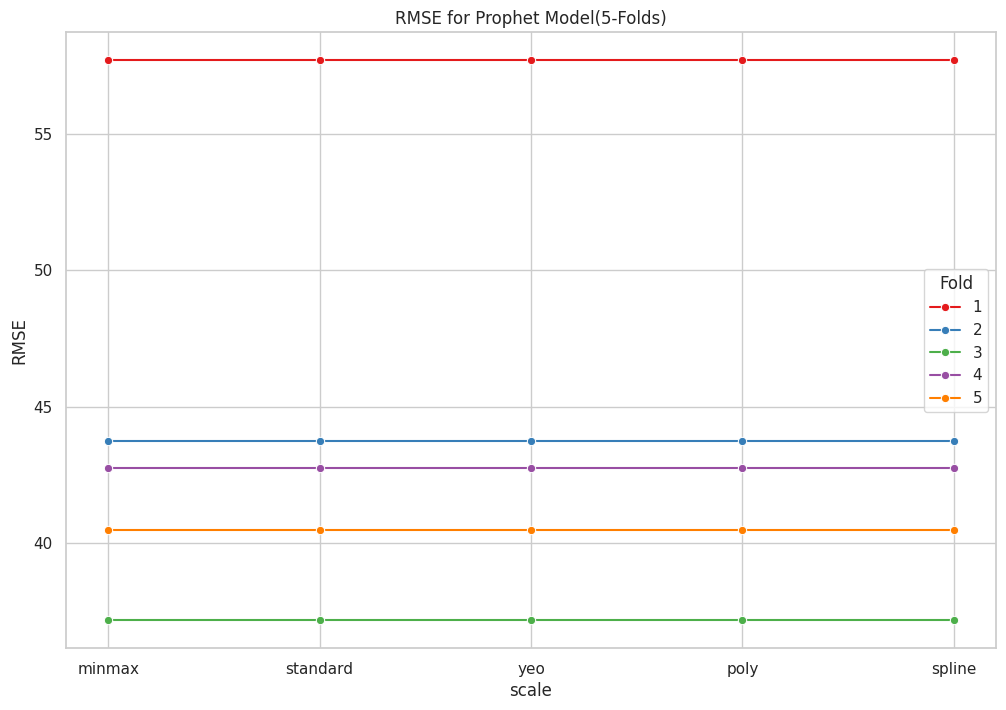

In [ ]:
from datetime import datetime
sns.set(rc = {"figure.figsize": (12, 8)})
sns.set_style("whitegrid")

# Prepare Data
holidays = ["2021-01-01", "2021-02-11", "2021-02-12", "2021-02-13", "2021-02-14",
            "2021-03-01", "2021-05-05", "2021-05-19", "2021-06-06", "2021-08-16"]

def prepare_data(df):
    df = df.copy()
    df['hour'] = df['ds'].dt.hour
    df['weekend_or_holiday'] = ((df['ds'].dt.weekday >= 4) |
                                (df['ds'].dt.strftime('%Y-%m-%d').isin(holidays))).astype(int)
    return df

# Load Data
daily_data_168 = pd.read_csv("daily_data_seasonality_168.csv", header=0, index_col=0, parse_dates=True)
daily_data_168 = daily_data_168.reset_index()
daily_data_168.rename(columns={'Date': 'ds', 'Average Peak Consumption in 1 hour': 'y'}, inplace=True)

# Prepare Binary Classification Target
daily_data_168['y_class'] = (daily_data_168['y'] >= 50).astype(int)

# TimeSeriesSplit 설정
tscv = TimeSeriesSplit(n_splits=5)

# Pipeline 정의
pipe1 = Pipeline([('minmax', MinMaxScaler()), ('prophet', ProphetTransformer(periods=30))])
pipe2 = Pipeline([('standard', StandardScaler()), ('prophet', ProphetTransformer(periods=30))])
pipe3 = Pipeline([('yeo', PowerTransformer()), ('prophet', ProphetTransformer(periods=30))])
pipe4 = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)), ('prophet', ProphetTransformer(periods=30))])
pipe5 = Pipeline([('spline', PolynomialFeatures(degree=2, include_bias=False)), ('prophet', ProphetTransformer(periods=30))])

pipes = {'minmax': pipe1, 'standard': pipe2, 'yeo': pipe3, 'poly': pipe4, 'spline': pipe5}

# RMSE를 저장할 리스트
rmse_scores = {name: [] for name in pipes.keys()}

# TimeSeriesSplit 기반 Prophet 모델 학습 및 평가
for fold, (train_index, test_index) in enumerate(tscv.split(daily_data_168)):
    print(f"Fold {fold + 1}")
    train, test = daily_data_168.iloc[train_index], daily_data_168.iloc[test_index]

    # Prepare Data
    train = prepare_data(train).dropna(subset=['y'])
    test = prepare_data(test).dropna(subset=['y'])

    for name, pipe in pipes.items():
        # Fit Pipeline
        pipe.named_steps['prophet'].fit(train)
        forecast = pipe.named_steps['prophet'].transform(test)

        # RMSE 계산
        y_true = test['y'].values
        y_pred = forecast['yhat'].iloc[:len(test)].values
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        rmse_scores[name].append(rmse)

# RMSE를 데이터프레임으로 변환
rmse_df = pd.DataFrame(rmse_scores)
rmse_df['fold'] = range(1, len(rmse_df) + 1)
rmse_df = rmse_df.melt(id_vars='fold', var_name='scale', value_name='rmse')

# RMSE 시각화
palette = sns.color_palette("Set1", n_colors=5)
plt.figure(figsize=(12, 8))
sns.lineplot(data=rmse_df, x='scale', y='rmse', hue='fold', marker='o', palette=palette)
plt.ylabel('RMSE')
plt.title('RMSE for Prophet Model(5-Folds)')
plt.legend(title='Fold')
plt.show()